<h1 style="color:Green;">Week 2 Lab - Solutions</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1IsoKGNILvIqfo_yzBJYTCIf9qg4YysTIOFrJix6jYDI/edit#slide=id.g11b032e97d3_0_0">[Week 2 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to practice portfolio hedging and risk management</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
from scipy.stats import t, laplace, expon, uniform, norm
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
import random
import pandas_datareader as pdr

<h2 style="color:Green;">Problem 1: Exploring Sector ETFs</h2><br/>

A sector exchange-traded fund (ETF) is a pooled investment vehicle that invests specifically in the stocks and securities of a particular industry or sector, typically identified in the fund's title. For instance, a sector ETF may track a representative basket of stocks from a specific economic sector.<br>
<br>
Here is the list of sector ETFs:
<ul>
  <li>Healthcare: XLV</li>
  <li>Utilities: XLU</li>
  <li>Consumer Staples: XLP</li>
  <li>Materials: XLB</li>
  <li>Financials: XLF</li>
  <li>Energy: XLE</li>
  <li>Real Estate: XLRE</li>
  <li>Information Technology: XLK</li>
  <li>Consumer Discretionary: XLY</li>
  <li>Communication Services: XLC</li>
  <li>Industrials: XLI</li>
</ul>

Suppose that a portfolio manager is interested in concentrating the clients' assets in two sector ETFs. You, as a quantitative analyst generated the summary statistics table below to help with the manager's decision.
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [2]:
ETF_SYMBOLS = ['XLV','XLU','XLP','XLB','XLF','XLE','XLRE','XLK','XLY','XLI','XLC'] # Enter the ticker symbols here
TAU = 5         # Enter duration of data you want from Yahoo Finance
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
etfPxList = pdr.DataReader(ETF_SYMBOLS, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
etfLogRetList = np.log(etfPxList).diff().dropna()
sum_stats = pd.DataFrame({'mean':etfLogRetList.mean(), 'sd': etfLogRetList.std(), 'skewness':etfLogRetList.skew(), 'excess kurtosis':etfLogRetList.kurtosis()})
sum_stats

mean        sd  skewness  excess kurtosis
Symbols                                               
XLV      0.000475  0.012546 -0.436086        11.186400
XLU      0.000487  0.014524 -0.228397        18.569851
XLP      0.000518  0.011110 -0.385680        17.048824
XLB      0.000421  0.015667 -0.650149        10.563008
XLF      0.000299  0.017723 -0.631750        14.060393
XLE      0.000223  0.024104 -0.973082        14.418292
XLRE     0.000438  0.015575 -1.556405        21.834711
XLK      0.000695  0.017691 -0.582188         9.855244
XLY      0.000350  0.015518 -1.057125        10.978149
XLI      0.000316  0.015669 -0.659399        12.867549
XLC      0.000183  0.015242 -0.781202         8.230965

a) Based on the summary statistics of the ETF's log returns, which two sector ETFs would you recommend to the portfolio manager? (Hint: compare the mean, sd, skewness, and excess kurtosis of each ETF's log return)

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> Based on the mean measure, I would recommend XLP and XLK since they yield the highest expected returns. Based on the standard deviation (sd), I would recommend XLP and XLE because they have lower values of sd, implying lower volatility. All ETF's log returns are skewed to the left, implying a negative-return tension overall, but using this metric, I would recommend XLP and XLU because their log returns skew the least towards the negative side. Using the excess kurtosis, I would propose XLK and XLC becasue they possess lighter tails compared to other ETF's, and lighter tail value means less probability of incurring extreme risks (as well as profits). 
<br><br> 
My first proposal would be XLP because it is selected in 3 of the 4 statistics 
<br><br> 
My second proposal would be XLK because it is selected in 2 of the 4 statistics. </p>

b) If the portfolio manager's objective is to achieve the maximum return with minimum risk, which two ETFs would you recommend to her? How does this differ from your recommendation in a)? <br>
(Hint 1: consider reward-to-risk ratio)<br>
(Hint 2:You can save time by using the following code chunk to automate any metric computation)

In [3]:
################ EDIT CODE LINES HERE #################
# Create an addition column in the summary table containing the risk-to-reward  ratios for each ETF and call it 'RR'
# It should only be a one line code
# After you create the column, run this code chunk to output the new summary statistics table

sum_stats['reward-to-risk ratio'] = sum_stats['mean']/sum_stats['sd'] 
sum_stats

#####################################################

mean        sd  skewness  excess kurtosis  reward-to-risk ratio
Symbols                                                                     
XLV      0.000475  0.012546 -0.436086        11.186400              0.037838
XLU      0.000487  0.014524 -0.228397        18.569851              0.033543
XLP      0.000518  0.011110 -0.385680        17.048824              0.046634
XLB      0.000421  0.015667 -0.650149        10.563008              0.026843
XLF      0.000299  0.017723 -0.631750        14.060393              0.016887
XLE      0.000223  0.024104 -0.973082        14.418292              0.009260
XLRE     0.000438  0.015575 -1.556405        21.834711              0.028112
XLK      0.000695  0.017691 -0.582188         9.855244              0.039278
XLY      0.000350  0.015518 -1.057125        10.978149              0.022548
XLI      0.000316  0.015669 -0.659399        12.867549              0.020161
XLC      0.000183  0.015242 -0.781202         8.230965              0.012017

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> If the portfolio manager's objective is to achieve the maximum return with minimum risk, I would recommend the two ETFs that have the highest reward-to-risk ratios (RR ratios). These turn out to be XLP and XLK, with RR ratios of 0.046634 and 0.039278, respectively.</p>

c) What is one visualizations that you can use to evaluate the selected ETFs before including them in your portfolio? (Hint: visualization techniques are suggested in the Exploratory Data Analysis (EDA) lecture)<br>
You can just name the visualization method. Extra credit is given to those who implement the visuaization in the following code chunk.

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> Time Plots</p>

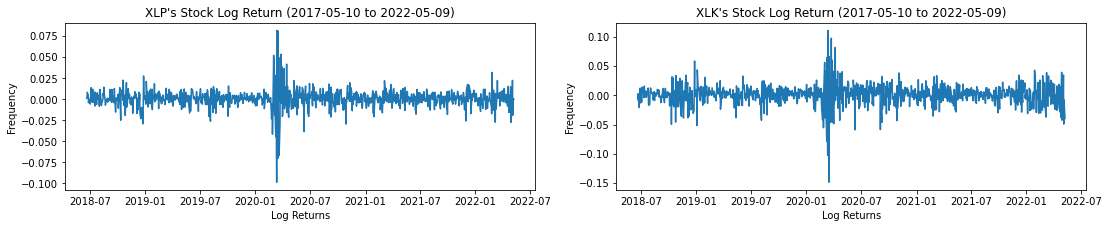

In [26]:
################ EDIT CODE LINES HERE #################

fig, axs = plt.subplots(1, 2, figsize=(16,4))
fig.tight_layout(pad=5)

# Time Plot for XLP 
axs[0].plot(etfLogRetList['XLP'])
axs[0].set_title("XLP's Stock Log Return ("+START_DATE+' to '+END_DATE+")")

# Time Plot for XLK 
axs[1].plot(etfLogRetList['XLK'])
axs[1].set_title("XLK's Stock Log Return ("+START_DATE+' to '+END_DATE+")")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Frequency')
    
#######################################################

<p style="color:blue;"> Scatter Plots</p>

Text(0.5, 1.0, 'Scatter Plot XLP vs XLK')

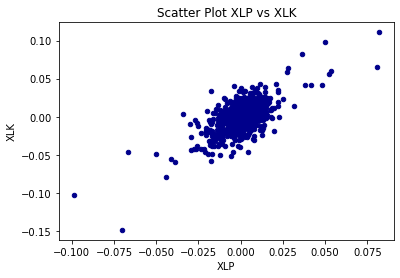

In [31]:
################ EDIT CODE LINES HERE #################

etfLogRetList.plot.scatter(x='XLP', y='XLK', c='DarkBlue')
plt.title('Scatter Plot XLP vs XLK')

#######################################################

<p style="color:blue;"> Correlation Heatmap</p>

Text(0.5, 1.0, 'Correlations Between XLP and XLK Log Returns')

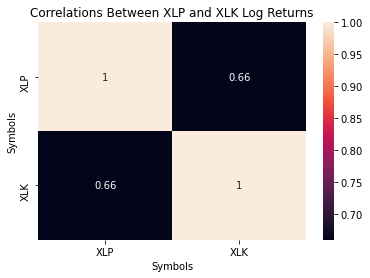

In [34]:
################ EDIT CODE LINES HERE #################

sns.heatmap(etfLogRetList[['XLP','XLK']].corr(),annot=True)
plt.title("Correlations Between XLP and XLK Log Returns")

#######################################################

<p style="color:blue;"> Box Plots</p>

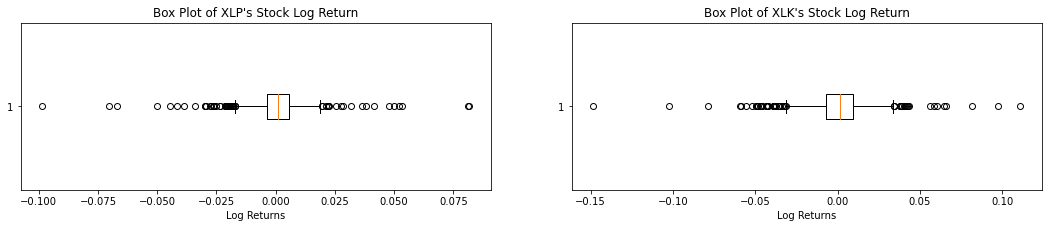

In [28]:
################ EDIT CODE LINES HERE #################

fig, axs = plt.subplots(1, 2, figsize=(16,4))
fig.tight_layout(pad=5)


# Box Plot for XLP 
axs[0].boxplot(etfLogRetList['XLP'], vert=False)
axs[0].set_title("Box Plot of XLP's Stock Log Return")

# Box Plot for XLK 
axs[1].boxplot(etfLogRetList['XLK'], vert=False)
axs[1].set_title("Box Plot of XLK's Stock Log Return")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns')
    
################################################################

<p style="color:blue;"> Histograms</p>

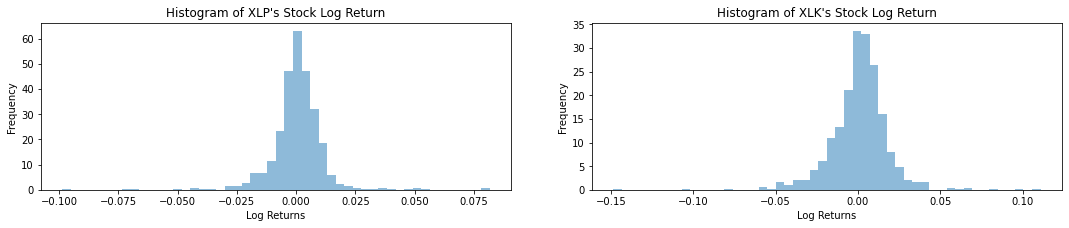

In [23]:
################ EDIT CODE LINES HERE (Optional) #################

fig, axs = plt.subplots(1, 2, figsize=(16,4))
fig.tight_layout(pad=5)

# Histogram for XLP 
axs[0].hist(etfLogRetList['XLP'], bins=50, density=1, alpha=0.5)
axs[0].set_title("Histogram of XLP's Stock Log Return")

# Histogram for XLK 
axs[1].hist(etfLogRetList['XLK'], bins=50, density=1, alpha=0.5)
axs[1].set_title("Histogram of XLK's Stock Log Return")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Frequency')

################################################################

<p style="color:blue;"> Other visualizations work as well.</p>

<h2 style="color:Green;">Problem 2: Evaluating Portfolio Risks</h2><br/>

After adding two sector ETFs from part a), the portoflio manager wants to add one more asset into her portfolio, but this time, she wants an asset with daily risks no more than 3% at a 10% significance level. You have become the portoflio manager's favorite quantitative analyst since the previous task, and have been asked to suggest an asset to add to her portfolio with follow-through analysis. Please follow the instructions specified in each part of this problem to deliver your suggestion and analysis.
<br><br>
Notice that any assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships.

a) Please specify your asset's ticker and their data duration here. 

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> Here, I suggested Bitcoin to add to the manager's portfolio.</p>

In [35]:
################ EDIT CODE LINES HERE #################

ASSET_TICKER = 'BTC-USD'     # Enter the asset's ticker here
TAU = 5             # duration span (in years) of observed data

###################################################

Run the following code chunk. <br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [36]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
# storing adjusted stock prices into a variable 
assetPx = pdr.get_data_yahoo(ASSET_TICKER, START_DATE, END_DATE)['Adj Close'] 
# converting prices to log returns and removing NaN values
assetLogRet = np.log(assetPx).diff().dropna()

b) Run the following code chunk and observe the histogram for the asset's log returns. Describe its mean, standard deviation, and shape.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

Text(0, 0.5, 'Density')

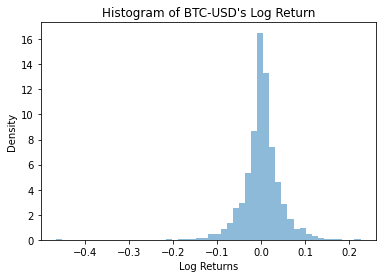

In [37]:
_, bins, _= plt.hist(assetLogRet, bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + ASSET_TICKER + "'s Log Return")
plt.xlabel("Log Returns"); plt.ylabel("Density")

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> From the histograms, BTC's log return seems to be centered at around 0, with tail values slightly skewed to the left. Profits seem to extend to a 30% log return quantile, while losses extend far out to the left to around the -40% extreme, which can be potential outliers. Note that 20% to 40% swing daily is a lot and seldom happens in the stock market, but Bitcoin belongs to the cryptocurrency market, which is shown to be extremely volatile here with high standard deviation.</p>

c) Run the following code chunk and select one of the three probabiltiy distribution curves that you think best fits the histogram. Name the probability distribution and its parameters (e.g., degrees of freedom, location, scale).<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

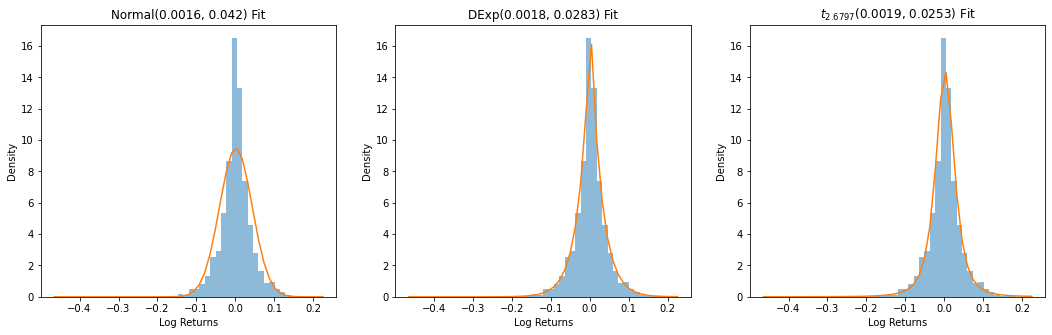

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# storing histogram bins and plotting the first histogram
_, bins, _ = axs[0].hist(assetLogRet, bins=50, density=1, alpha=0.5)

#---------------------------w/ Normal PDF-----------------------------
mu, sigma = stats.norm.fit(assetLogRet)
axs[0].plot(bins, stats.norm.pdf(bins, mu, sigma), label='normal pdf')
axs[0].set_title("Normal("+str(np.round(mu, 4))+', '+str(np.round(sigma, 4))+") Fit")

#---------------------------w/ Double Exponential PDF-----------------------------
axs[1].hist(assetLogRet, bins=50, density=1, alpha=0.5)
loc_dexp, scale_dexp = stats.laplace.fit(assetLogRet)
axs[1].plot(bins, laplace.pdf(bins, loc_dexp, scale_dexp), label='double exponential pdf')
axs[1].set_title("DExp("+str(np.round(loc_dexp, 4))+', '+str(np.round(scale_dexp, 4))+") Fit")

#---------------------------w/ Student-t PDF-----------------------------
axs[2].hist(assetLogRet, bins=50, density=1, alpha=0.5)
df_t, loc_t, scale_t = stats.t.fit(assetLogRet)
axs[2].plot(bins, t.pdf(bins, df_t, loc_t, scale_t), label='student-t pdf')
axs[2].set_title("$t_{"+str(np.round(df_t, 4))+"}$"+"("+str(np.round(loc_t, 4))+', '+str(np.round(scale_t, 4))+") Fit")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Density')

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> The double exponential distribution seems to fit the histogram the best because it closely traces the tails values, shoulders, and the peak of the frequency distribution. This distribution curve is tuned with mean parameter = 0.0018 and scale parameter = 0.0283.</p>

d)  If you cannot differentiate which distribution is a better fit from part b), run the follow code to fit QQ plots to the asset's log return quantiles. Then select one of the three QQ plots that you think best fits the log return quantiles. What is the theoretical distribution in this QQ plot? Is this distribution same as the one you selected in part b)?<br>

<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

<b style="color:blue;"> Solution: </b>

Text(0.5, 1.0, "Student-t QQ Plot of BTC-USD's Log Return")

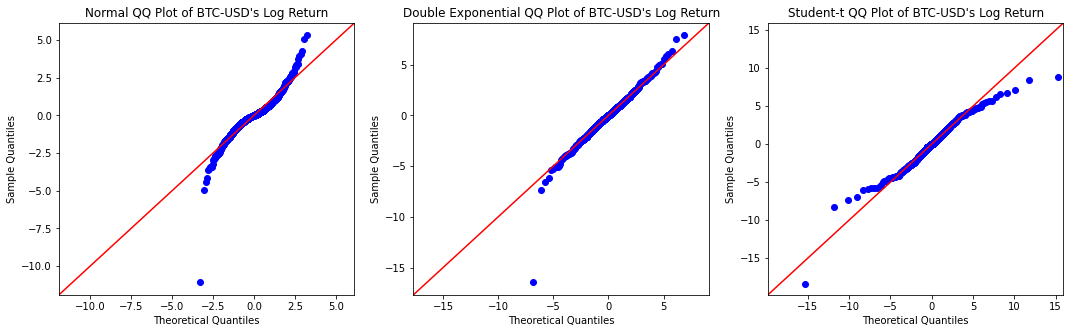

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#---------------------------w/ Normal QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.norm, fit=True, line='45', ax=axs[0])
axs[0].set_title("Normal QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Double Exponential QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.laplace, fit=True, line='45', ax=axs[1])
axs[1].set_title("Double Exponential QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Student-t QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.t, fit=True, line='45', ax=axs[2])
axs[2].set_title("Student-t QQ Plot of " + ASSET_TICKER + "'s Log Return")

<p style="color:blue;"> The QQ plot with theoretical double exponential quantiles seem to best-fit those of Bitcoin's daily log returns because quantiles from the two populations, when plotted against each other, lie close on the red line, which represent similarity in population quantiles. In other words, it is safe to say that Bitcoin's daily log returns come from a double exponential distribution. This distribution is the same as the one I selected in part b).</p>

e)You are going to make a table summarizing the rVaR and rES at each significant levels with their respective quantiles. Of the code chunks (i), (ii), and (iii), run the appropriate code chunk to get the correct risk information.
<ul>
  <li type = "i">Run if Normal Distribution is selected in part c)</li>
  <li type = "i">Run if Double Exponential Distribution is selected in part c)</li>
  <li type = "i">Run if Student-t Distribution is selected in part c)</li>
</ul>

<b style="color:blue;"> Solution: </b>

(i) <p style="color:blue;">IF YOU SELECTED THE NORMAL DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [84]:
quantile_10 = norm.ppf(0.1, mu, sigma)
quantile_5 = norm.ppf(0.05, mu, sigma)
quantile_1 = norm.ppf(0.01, mu, sigma)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(norm.rvs(loc = mu, scale = sigma, size = 10000000))-1)      # enter code before this comment

(ii) <p style="color:blue;">IF YOU SELECTED THE DOUBLE EXPONENTIAL DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [41]:
quantile_10 = laplace.ppf(0.1, loc_dexp, scale_dexp)
quantile_5 = laplace.ppf(0.05, loc_dexp, scale_dexp)
quantile_1 = laplace.ppf(0.01, loc_dexp, scale_dexp)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(laplace.rvs(loc = loc_dexp, scale = scale_dexp, size = 10000000))-1)      # enter code before this comment

(iii) <p style="color:blue;">IF YOU SELECTED THE STUDENT-T DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [86]:
quantile_10 = t.ppf(0.1, df_t, loc_t, scale_t)
quantile_5 = t.ppf(0.05, df_t, loc_t, scale_t)
quantile_1 = t.ppf(0.01, df_t, loc_t, scale_t)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(t.rvs(df = df_t, loc = loc_t, scale = scale_t, size = 10000000))-1)      

Run the following code chunk to get the relative Value-at-Risk (rVaR) at each significance level.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [43]:
rVaR_10 = -(np.exp(quantile_10)-1)     
rVaR_5 = -(np.exp(quantile_5)-1)     
rVaR_1 = -(np.exp(quantile_1)-1)    
rVaR = [rVaR_10, rVaR_5, rVaR_1] 

Run the following code chunk to get the relative Expected Shortfall (ES) at each significance level.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [44]:
rES_10 = np.mean(simLoss[simLoss>rVaR_10])   
rES_5 = np.mean(simLoss[simLoss>rVaR_5])      
rES_1 = np.mean(simLoss[simLoss>rVaR_1])      
rES = [rES_10, rES_5, rES_1] 

Run the following code chunk to output the risk summary table.

In [45]:
pd.DataFrame({'Significance Level': ['10%', '5%', '1%'], 'Quantile': [quantile_10, quantile_5, quantile_1], 'rVaR': [rVaR_10, rVaR_5, rVaR_1], 'rES':[rES_10, rES_5, rES_1]})

Significance Level  Quantile      rVaR       rES
0                10% -0.043807  0.042861  0.069275
1                 5% -0.063451  0.061480  0.087386
2                 1% -0.109064  0.103327  0.128093

f) The portfolio manager tells you that she is planning to invest $95000 into the stock that you recommended in this problem, and wants to know at least how much (in dollar amount) she has to set aside to sustain the loss that occurrs at a 10% significance level. What would you tell her?

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> From the rVaR calculation above, there is a 10% probability that at least 4.2861% * $95000 = $4071.8 has to be set aside to prepare for the drawdown in the next trading day.</p>

g) She also wants to know on average, how much (in percentage) of her portfolio should she size in to sustain the loss that occurrs at a 5% significance level. What would you tell her?

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> From the rER calculation above, given that there is a 5% probability that you will lose at least 6.15% of your portfolio, an average of 8.74% of your portfolio has to be set aside to sustain the drawdown in the next trading day.</p>